### 1) Read yelp.csv or yelp.json into pandas DataFrame

In [2]:
import pandas as pd
from collections import defaultdict
yelp = pd.read_csv('../DAT-DC-10/data/yelp.csv')
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [3]:
d = defaultdict(pd.Series)
lines = []
with open('../DAT-DC-10/data/yelp.json') as f:
    lines = f.readlines()

for i in range(0, len(lines)):
    d[i] = pd.read_json(lines[i], typ='series')
    d[i]['cool'] = d[i].votes['cool']
    d[i]['funny'] = d[i].votes['funny']
    d[i]['useful'] = d[i].votes['useful']


In [4]:
d[18]

business_id                               b5cEoKR8iQliq-yT2_O0LQ
date                                                  2009-03-06
review_id                                 v0cTd3PNpYCkTyGKSpOfGA
stars                                                          3
text           I met a friend for lunch yesterday. \n\nLoved ...
type                                                      review
user_id                                   UsULgP4bKA8RMzs8dQzcsA
votes                    {u'funny': 4, u'useful': 6, u'cool': 5}
cool                                                           5
funny                                                          4
useful                                                         6
dtype: object

In [5]:
yelp_df = pd.DataFrame.from_dict(data=d, orient = 'index')

### 2) Explore the relationship between each of the vote types and number of stars
* Pairwise plot of vote type vs. stars
    - Pandas scatter plot
    - Seaborn scatter plot with linear regression line
    - Seaborn pairplot with linear models
    - Boxplot of star rating vs. vote type
    - Pairwise cross-tabs for vote type value and star rating value -- as counts (3 crosstabs)
    - Heatmap
* Table 

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.dpi'] = 80

/home/anna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd44022550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7efd438c44d0>]], dtype=object)

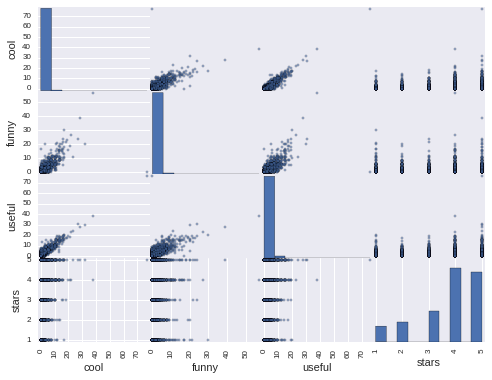

In [7]:
pd.scatter_matrix(yelp_df[['cool', 'funny', 'useful', 'stars']])

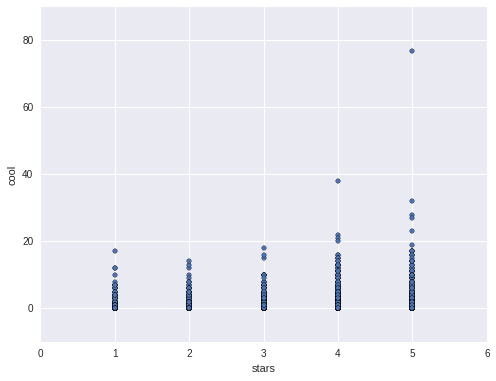

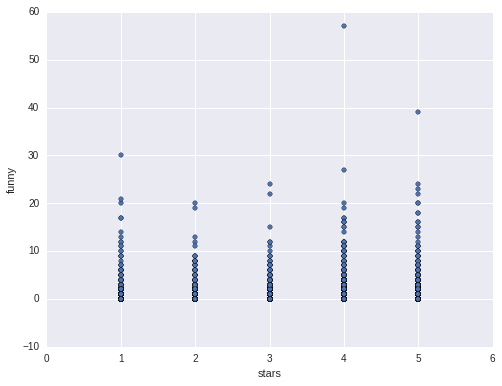

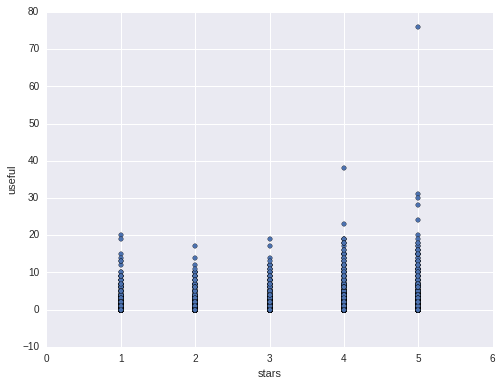

In [8]:
# Pandas scatter plot [cool, funny, useful] vs. stars
yelp_df.plot(x='stars', y='cool', kind="scatter")
yelp_df.plot(x='stars', y='funny', kind="scatter")
yelp_df.plot(x='stars', y='useful', kind="scatter")


In [ ]:
# 

In [9]:
yelp_df.describe()

,stars,cool,funny,useful
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,0.701300,1.409300
std,1.214636,2.067861,1.907942,2.336647
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,1.000000
75%,5.000000,1.000000,1.000000,2.000000
max,5.000000,77.000000,57.000000,76.000000


/home/anna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


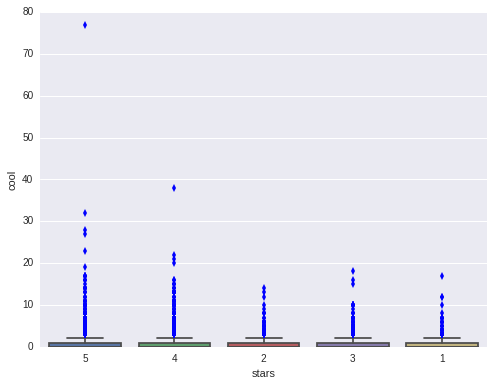

In [10]:
# These boxplots were not useful because of the large # reviews w/ 0 votes
sns.boxplot(y='cool',x='stars', data=yelp_df, fliersize=5.0)

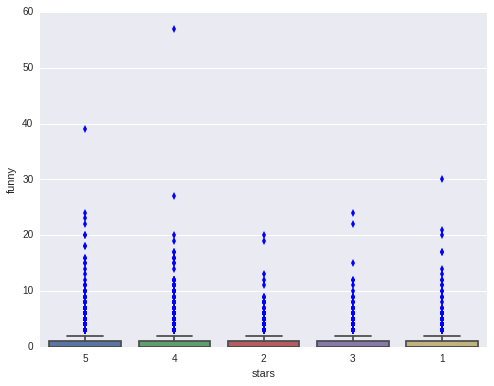

In [11]:
sns.boxplot(y='funny',x='stars', data=yelp_df)

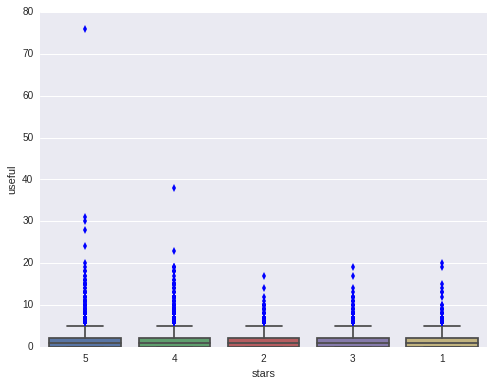

In [12]:
sns.boxplot(y='useful',x='stars', data=yelp_df)

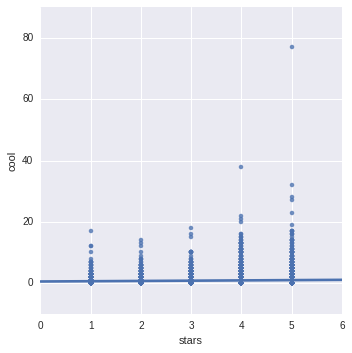

In [14]:
sns.lmplot(x='stars',y='cool',data=yelp_df, truncate = False)

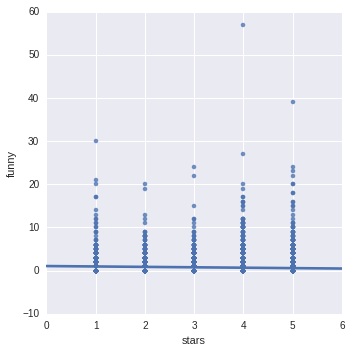

In [15]:
sns.lmplot(x='stars',y='funny',data=yelp_df)

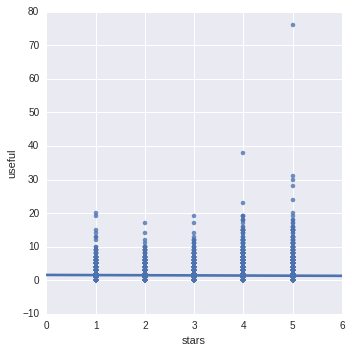

In [16]:
sns.lmplot(x='stars',y='useful',data=yelp_df)

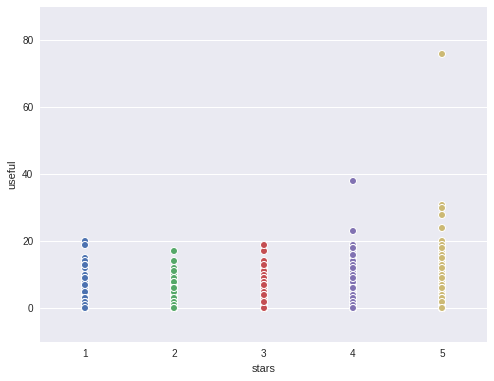

In [17]:
sns.stripplot(x='stars', y='useful', data=yelp_df, order=[1,2,3,4,5])

In [18]:
cols = ['cool', 'funny', 'useful']

for j in range(0,len(cols)):
    print cols[j]
    for i in range(1,6):
        print '  star=', i, cols[j]+ ' avg=', yelp_df[yelp_df.stars == i][cols[j]].mean()


cool
  star= 1 cool avg= 0.576769025367
  star= 2 cool avg= 0.719525350593
  star= 3 cool avg= 0.788501026694
  star= 4 cool avg= 0.954622802042
  star= 5 cool avg= 0.944261312556
funny
  star= 1 funny avg= 1.05607476636
  star= 2 funny avg= 0.87594390507
  star= 3 funny avg= 0.694729637235
  star= 4 funny avg= 0.67044809983
  star= 5 funny avg= 0.608630506443
useful
  star= 1 useful avg= 1.60480640854
  star= 2 useful avg= 1.56310679612
  star= 3 useful avg= 1.30663928816
  star= 4 useful avg= 1.39591605218
  star= 5 useful avg= 1.38178004195


Observations;  There seems to be a relationship between cool and useful.  But I am not sure what if-any relationship between cool/fun/useful and stars. From the plots I can't see that there is a direct linear relationship between stars vs. any type vote.  The seaborn lmplot might show a linear relationship but hard to see because of scale. Also the fact that it is a horizontal line seems to indicate that if there is linear relationship it isn't really a strong one.

### 3) Set cool/funny/useful as features and stars as response

In [19]:
cols = ['cool','funny','useful']
X = yelp_df[cols]
y = yelp_df.stars

In [20]:
X.head()

,cool,funny,useful
0,2,0,5
1,0,0,0
2,0,0,1
3,1,0,2
4,0,0,0


In [21]:
y.head()

0    5
1    5
2    4
3    5
4    5
Name: stars, dtype: int64

### 4) Fit a linear regression model and interpret the coefficients. 
* Do the coefficients make intuitive sense to you? 
* Explore the Yelp website to see if you detect similar trends.

In [22]:
from sklearn import linear_model

In [23]:
linreg = linear_model.LinearRegression()

In [24]:
yelp_model = linreg.fit(X,y)
print yelp_model.coef_
print yelp_model.intercept_

[ 0.27435947 -0.13567449 -0.14745239]
3.83989479278


##### Linear model interpretation of:
       y = 3.840 + 0.2744 * cool + -0.1357 * funny + -0.1475 * useful
##### Holding all other respective x variables steady:
* The star rating increases .2744 points when cool is increased by 1 vote (this makes sense)
* The star rating decreases .1357 points when funny is increased by 1 vote (I guess this makes sense -- often funny remarks are made when disparaging an establishment)
* The star rating decreases .1475 points when useful is increased by 1 vote (this also makes sense -- folks find something useful particularly if they know to *avoid* it)
* The cool factor is weighted about 2x more than either the funny or useful


### 5) Evaluate the model
* Split into training and testing sets
* Compute the RMSE 
* Does the RMSE make intuitive sense to you?

In [25]:
from sklearn import cross_validation

In [26]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
print X.shape
print y.shape

(10000, 3)
(10000,)


In [28]:
print train_X.shape
print test_X.shape
print train_y.shape
print test_y.shape

(6700, 3)
(3300, 3)
(6700,)
(3300,)


In [29]:
linreg = linear_model.LinearRegression()

In [30]:
train_model = linreg.fit(train_X, train_y)

In [31]:
print train_model.coef_
print train_model.intercept_

[ 0.33607335 -0.18334583 -0.15679006]
3.82919319704


##### This is the old model using all of the data to train on:
           y = 3.840 + 0.2744 * cool + -0.1357 * funny + -0.1475 * useful
##### This is the train model using only training data (2/3 of the data set):
           y = 3.829 + 0.3351 * cool + -0.1833 * funny + -0.1568 * useful

In [32]:
# this will give predictions using the test matrix 
pred = train_model.predict(test_X)

In [33]:
from sklearn import metrics

In [34]:
# get mean square error
mserr = metrics.mean_squared_error(test_y, pred)

In [35]:
rmserr = np.sqrt(mserr)

In [36]:
rmserr

1.2002755036281352

### 6) Try removing some of the features and see if the RMSE improves.

In [37]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import metrics

def calc_rmse(feature_list, X, y):
    X1 = X[feature_list]
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X1, y, test_size=0.33, random_state = 42)
    linreg = linear_model.LinearRegression()
    train_model = linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    mserr = metrics.mean_squared_error(y_test, y_pred)
    rmserr = np.sqrt(mserr)
    print feature_list, 'rmse=', rmserr
    print 'linear coeff:', linreg.coef_ 
    print 'intercept:', linreg.intercept_

In [38]:
feats = ['cool', 'funny', 'useful']
X = yelp_df[feats]
y = yelp_df.stars
calc_rmse(feats, X, y)

['cool', 'funny', 'useful'] rmse= 1.20027550363
linear coeff: [ 0.33607335 -0.18334583 -0.15679006]
intercept: 3.82919319704


In [39]:
# Removed funny based on previous scatter plots, funny did not really have as much of linear relationship 
feats = ['cool','useful']
calc_rmse(feats, X, y)

['cool', 'useful'] rmse= 1.19505494042
linear coeff: [ 0.21495604 -0.18781686]
intercept: 3.84780151159


In [40]:
feats = ['cool','funny']
calc_rmse(feats, X, y)

['cool', 'funny'] rmse= 1.2095790831
linear coeff: [ 0.20086026 -0.2087886 ]
intercept: 3.74429676936


In [41]:
feats = ['funny','useful']
calc_rmse(feats, X, y)

['funny', 'useful'] rmse= 1.20367776112
linear coeff: [-0.05701219  0.01520036]
intercept: 3.78984965694


In [42]:
feats = ['cool']
calc_rmse(feats, X, y)

['cool'] rmse= 1.20290703502
linear coeff: [ 0.02771074]
intercept: 3.74641422819


##### The conclusion is that the features cool and useful are best predictors of rating (over funny)

### 7) Think of some new features
* create features from the existing data that might be predictive of the response
* figure out how to create those features in Pandas
* add them to your model, and see if the RMSE improves.

* Question:  Say that I wanted to add a new feature like mean of the star ratings.  How would I do that?  Just on training data? Are feature values derived just from training set?

### a) Adding together or multiplying existing features

In [43]:
print yelp_df.shape
yelp_df['vote_total'] = yelp_df.cool + yelp_df.useful
# excluded yelp_df.funny from total because rmse is too high
yelp_df.head(3)

(10000, 11)


,business_id,date,review_id,stars,text,type,user_id,votes,cool,funny,useful,vote_total
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}",2,0,5,7
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,0,1,1


In [44]:
# A large number of reviews are zero in at least type: cool, funny, or useful.  
# A lower percentage has no votes across all three
print 'total', len(yelp_df)
print sum(yelp_df.cool == 0)
print sum(yelp_df.funny == 0)
print sum(yelp_df.useful == 0)
print sum(yelp_df.vote_total == 0)

total 10000
6290
7013
4130
3874


In [45]:
# Possible to include vote_total into previous linear model
cols = ['cool', 'useful', 'vote_total']
X = yelp_df[cols]
y = yelp_df.stars
calc_rmse(cols, X, y)

['cool', 'useful', 'vote_total'] rmse= 1.19474325017
linear coeff: [ -1.08615515e+12  -1.08615515e+12   1.08615515e+12]
intercept: 3.84090951493


In [46]:
cols = ['vote_total', 'useful']
X = yelp_df[cols]
y = yelp_df.stars
calc_rmse(cols, X, y)

cols = ['vote_total', 'cool']
X = yelp_df[cols]
calc_rmse(cols, X, y)

cols = ['vote_total']
X = yelp_df[cols]
calc_rmse(cols, X, y)

['vote_total', 'useful'] rmse= 1.19505494042
linear coeff: [ 0.21495604 -0.4027729 ]
intercept: 3.84780151159
['vote_total', 'cool'] rmse= 1.19505494042
linear coeff: [-0.18781686  0.4027729 ]
intercept: 3.84780151159
['vote_total'] rmse= 1.20565666912
linear coeff: [-0.00060632]
intercept: 3.77198097167


In [47]:
# Multiplying fields together? 
yelp_df['vote_mult'] = yelp_df.cool * yelp_df.useful

In [48]:
cols = ['cool', 'useful', 'vote_mult']
X = yelp_df[cols]
y = yelp_df.stars
calc_rmse(cols, X, y)

cols = ['vote_mult', 'useful']
X = yelp_df[cols]
y = yelp_df.stars
calc_rmse(cols, X, y)

cols = ['vote_mult', 'cool']
X = yelp_df[cols]
calc_rmse(cols, X, y)

cols = ['vote_mult']
X = yelp_df[cols]
calc_rmse(cols, X, y)

cols = ['cool', 'useful', 'vote_total']
X = yelp_df[cols]
y = yelp_df.stars
calc_rmse(cols, X, y)


['cool', 'useful', 'vote_mult'] rmse= 1.1948930658
linear coeff: [ 0.21815072 -0.18722146 -0.00029779]
intercept: 3.84565878869
['vote_mult', 'useful'] rmse= 1.25205565805
linear coeff: [ 0.00445978 -0.06881557]
intercept: 3.84538235634
['vote_mult', 'cool'] rmse= 1.20826754114
linear coeff: [-0.00157396  0.04773324]
intercept: 3.73678787617
['vote_mult'] rmse= 1.20621000055
linear coeff: [ 0.00083262]
intercept: 3.76644597154
['cool', 'useful', 'vote_total'] rmse= 1.19474325017
linear coeff: [ -1.08615515e+12  -1.08615515e+12   1.08615515e+12]
intercept: 3.84090951493


##### Conclusion:  vote_total, cool, useful provide the better linear combination to predict star rating.  
* Is there a better way to come up with features? I am doing this by trial and error??
* Best I could get is: RMSE 1.19474325017 using ['cool', 'useful', 'vote_total'] features

### b) Trying simple word/sentiment analysis

In [49]:
# Trying a different sentiment list from bill McDonald Notre dame.
from collections import defaultdict

dd = defaultdict(dict)
with open('./loughran2014.cat') as f:
    lines = f.readlines()

adder = -99
word_type = ''

for line in lines:
    line = line.strip().strip('.')
    if line in ['NEGATIVE', 'LITIGIOUS', 'INTERESTING']:
        adder = -1
        word_type = line
        continue
    elif line == 'POSITIVE':
        adder = 1
        word_type = line
        continue
    elif line in ['UNCERTAINTY','CONSTRAINING', 'SUPERFLUOUS', 'MODAL WORDS STRONG', 'MODAL WORDS WEAK']:
        adder = 0
        word_type = line
        continue
    else:
        d = {}
        l = line.split()
        word = l[0].lower()
        d['wd'] = word
        d['wtyp'] = word_type
        d['sentiment'] = adder
        dd[word] = d

In [50]:
# spot-checking sentiment and word-type
print dd['abandon'], '\n', dd['best'], '\n', dd['achieve'], '\n', dd['ban']
print dd['always'],  '\n', dd['effectuate'],'\n', dd['abide'], '\n', dd['probate']

{'wtyp': 'NEGATIVE', 'wd': 'abandon', 'sentiment': -1} 
{'wtyp': 'POSITIVE', 'wd': 'best', 'sentiment': 1} 
{'wtyp': 'POSITIVE', 'wd': 'achieve', 'sentiment': 1} 
{'wtyp': 'INTERESTING', 'wd': 'ban', 'sentiment': -1}
{'wtyp': 'MODAL WORDS STRONG', 'wd': 'always', 'sentiment': 0} 
{'wtyp': 'SUPERFLUOUS', 'wd': 'effectuate', 'sentiment': 0} 
{'wtyp': 'CONSTRAINING', 'wd': 'abide', 'sentiment': 0} 
{'wtyp': 'LITIGIOUS', 'wd': 'probate', 'sentiment': -1}


In [51]:
# The above lexicon is still not comprehensive enough, so adding to it with another lexicon from UIUC 
# https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon

def populate_dictionary(word_type, lines, adder):
    for line in lines:
        line = line.strip()
        d = {}
        l = line.split()
        word = l[0].lower()
        d['wd'] = word
        d['wtyp'] = word_type 
        d['sentiment'] = adder
        dd[word] = d

with open('./positive-words.txt') as f:
    lines = []
    lines = f.readlines()
    populate_dictionary('POSITIVE', lines, 1)

with open('./negative-words.txt') as f:
    lines = []
    lines = f.readlines()
    populate_dictionary('NEGATIVE', lines, -1)


In [52]:
# test
print dd['amazing']
print dd['awesome']
print dd['spotty']
print len(dd)

{'wtyp': 'POSITIVE', 'wd': 'amazing', 'sentiment': 1}
{'wtyp': 'POSITIVE', 'wd': 'awesome', 'sentiment': 1}
{'wtyp': 'NEGATIVE', 'wd': 'spotty', 'sentiment': -1}
9643


In [53]:
# Function that determines sentiment count based in a dictionary you pass in 
import string
def sentiment_word_count(dd):
    for i, row in yelp_df.iterrows():
        rev = row.text
        strings = rev.split(' ')
        total = 0
        for s in strings:
            s = s.lower().strip()
            s = ''.join(ch for ch in s if ch not in string.punctuation)
            # print s
            if len(dd[s]) != 0:
                # print 'key=', s, 'sentiment=', dd[s]['sentiment']
                total += dd[s]['sentiment']

        #print rev, '\n', total
        yelp_df.loc[i, 'sentiment'] = total

In [54]:
# This will feed in the new dictionary of words and scores and use it to set the sentiment field in yelp_df
sentiment_word_count(dd)

In [55]:
yelp_df.head(2)

,business_id,date,review_id,stars,text,type,user_id,votes,cool,funny,useful,vote_total,vote_mult,sentiment
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}",2,0,5,7,10,12
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0,0,0,8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd39ab8cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7efd39348710>]], dtype=object)

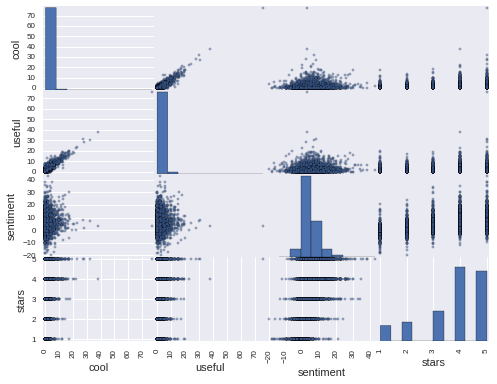

In [56]:
pd.scatter_matrix(yelp_df[['cool', 'useful', 'sentiment', 'stars']])

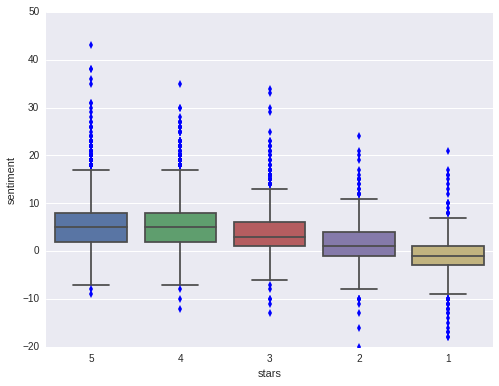

In [57]:
sns.boxplot(x='stars', y='sentiment', order=[5,4,3,2,1], data = yelp_df)

##### Observation:  there might be a trend here with sentiment count to star rating

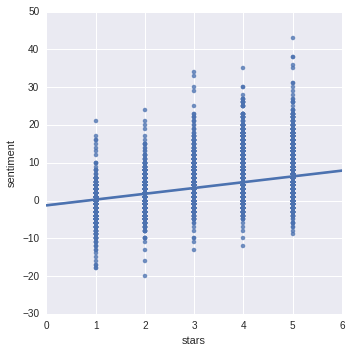

In [58]:
sns.lmplot(x='stars', y='sentiment', data = yelp_df)

In [59]:
yelp_df.columns

Index([u'business_id',        u'date',   u'review_id',       u'stars',
              u'text',        u'type',     u'user_id',       u'votes',
              u'cool',       u'funny',      u'useful',  u'vote_total',
         u'vote_mult',   u'sentiment'],
      dtype='object')

In [60]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import metrics
import numpy as np

# Set up feature matrix X and response y
cols = ['cool', 'useful', 'vote_total', 'sentiment']
X = yelp_df[cols]
y = yelp_df.stars

# Split data set into train and test
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state = 1)

# Create linear regression model based on trian data
linreg = linear_model.LinearRegression()
train_model = linreg.fit(X_train, y_train)

# Look at results using test data
y_pred = linreg.predict(X_test)

# Compare test prediction with truth
mean_squ_err = metrics.mean_squared_error(y_test, y_pred)
print np.sqrt(mean_squ_err)

1.11649074142


In [61]:
# Because sentiment of words might be a better predictor than cool/useful, I will square this feature
yelp_df['sent_squ'] = yelp_df.sentiment **2

In [62]:
# test
cols = ['vote_total', 'sentiment', 'sent_squ']
X = yelp_df[cols]
y = yelp_df.stars
calc_rmse(cols, X, y)

['vote_total', 'sentiment', 'sent_squ'] rmse= 1.08898909923
linear coeff: [-0.00725148  0.1625655  -0.0053063 ]
intercept: 3.29659935868


In [63]:
cols = ['cool', 'vote_total','sentiment','sent_squ']
X = yelp_df[cols]
y = yelp_df.stars
calc_rmse(cols, X, y)

['cool', 'vote_total', 'sentiment', 'sent_squ'] rmse= 1.08040076051
linear coeff: [ 0.3455094  -0.16809361  0.15835997 -0.00505751]
intercept: 3.36959231923


In [176]:
# text length as another feature
for ind, v in yelp_df.iterrows():
    yelp_df.loc[ind, 'textlen'] = np.log(len(yelp_df.loc[ind, "text"]))


In [177]:
yelp_df.head(3)

,business_id,date,review_id,stars,text,type,user_id,votes,cool,funny,useful,vote_total,vote_mult,sentiment,sent_squ,textlen
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}",2,0,5,7,10,12,144,6.790097
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}",0,0,0,0,0,8,64,7.204149
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}",0,0,1,1,0,2,4,4.330733


In [178]:
cols = ['cool', 'vote_total','sentiment','sent_squ', 'textlen']
X = yelp_df[cols]
y = yelp_df.stars
calc_rmse(cols, X, y)

['cool', 'vote_total', 'sentiment', 'sent_squ', 'textlen'] rmse= 1.05388869455
linear coeff: [ 0.29090247 -0.12448587  0.16947833 -0.00422775 -0.3440288 ]
intercept: 5.36240201546


### 8) Compare against NULL model
* This is the model that ignores all features and simply predicts the mean response value in the testing set.

In [66]:
print yelp_df.stars.mean()
print len(y_test)

3.7775
2500


In [67]:
np.ones(len(y_test)) * yelp_df.stars.mean()

array([ 3.7775,  3.7775,  3.7775, ...,  3.7775,  3.7775,  3.7775])

In [68]:
y_null = pd.Series(np.ones(len(y_test)) * yelp_df.stars.mean())

In [69]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

1.2123276166119454

##### Conclusion:
* Other feature could be added could be based on time of day (AM/PM) or (Weekday/Wkend) from the date  
* Get a better sentiment dictionary that includes food terms, my dictionary only included business/finance/legal terms
* rmse 1.1236 was the best I could do using feature ['cool', 'useful', 'vote_total', 'sentiment', 'sent_squ']
* rmse 1.0539 after dictionary was improved a bit more using ['cool', 'vote_total', 'sentiment', sent_squ', 'textlen']
* Null rmse was 1.2123

### 9) Treat as Classification Problem
* Use KNN

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

In [179]:
yelp_df.columns

Index([u'business_id',        u'date',   u'review_id',       u'stars',
              u'text',        u'type',     u'user_id',       u'votes',
              u'cool',       u'funny',      u'useful',  u'vote_total',
         u'vote_mult',   u'sentiment',    u'sent_squ',     u'textlen'],
      dtype='object')

In [180]:
col_map = colors.ListedColormap(['white', 'red','blue', 'orange', 'green'])
# create a scatter plot of  versus  and color by Star-rating
cols = ['cool', 'useful', 'funny', 'vote_total', 'vote_mult', 'sentiment', 'sent_squ', 'stars', 'textlen']
yelp_subset = yelp_df[cols]

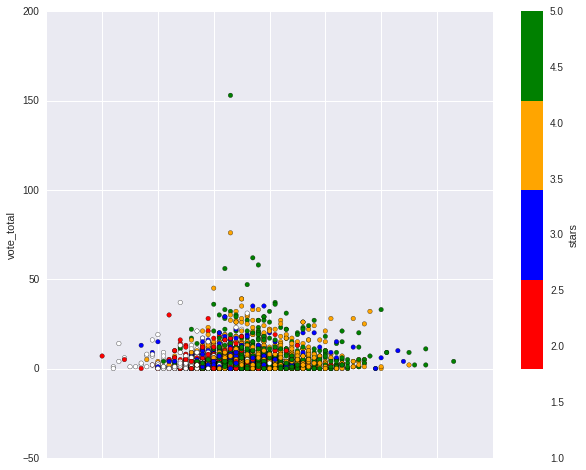

In [181]:
# Trying to see if there is any kind of inherent clustering here, doesn't look like it
yelp_subset.plot(x='sentiment', y='vote_total', kind = 'scatter', c='stars', colormap = col_map)

In [182]:
yelp_5 = yelp_subset[yelp_subset.stars == 5]
yelp_4 = yelp_subset[yelp_subset.stars == 4]
yelp_3 = yelp_subset[yelp_subset.stars == 3]
yelp_2 = yelp_subset[yelp_subset.stars == 2]
yelp_1 = yelp_subset[yelp_subset.stars == 1]

count    3337.000000
mean        5.670363
std         4.896084
min        -9.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        43.000000
Name: sentiment, dtype: float64 

count    3337.000000
mean        2.326041
std         5.048900
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       153.000000
Name: vote_total, dtype: float64


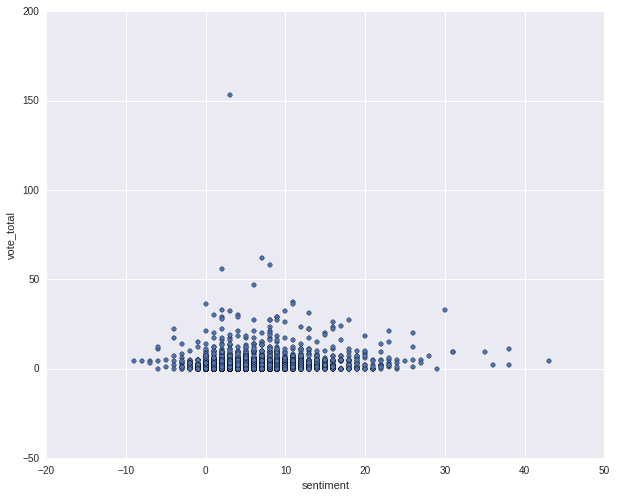

In [75]:
yelp_subset[yelp_subset.stars == 5].plot(kind="scatter",x="sentiment",y="vote_total")
print yelp_5.sentiment.describe(), '\n'
print yelp_5.vote_total.describe()

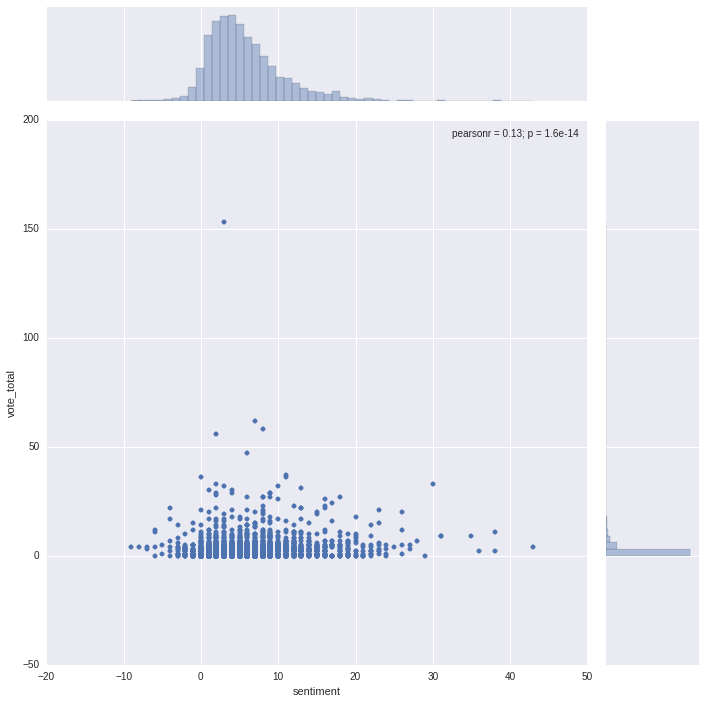

In [76]:
sns.jointplot(x='sentiment',y='vote_total', data=yelp_subset[yelp_subset.stars == 5], size = 10)

count    3526.000000
mean        5.621100
std         4.775582
min       -12.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        35.000000
Name: sentiment, dtype: float64 

count    3526.000000
mean        2.350539
std         4.164788
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        76.000000
Name: vote_total, dtype: float64


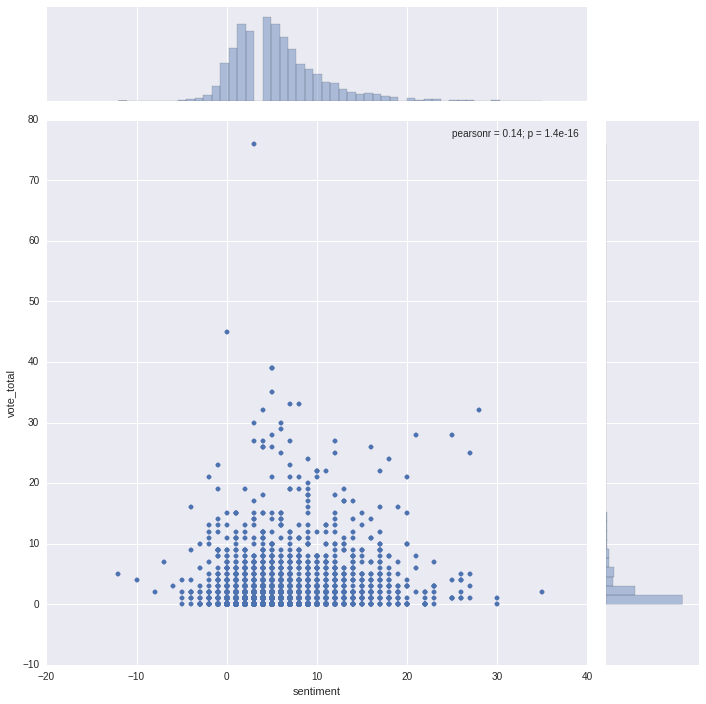

In [77]:
#yelp_subset[yelp_subset.stars == 4].plot(kind="scatter",x="sentiment",y="vote_total")
sns.jointplot(data=yelp_subset[yelp_subset.stars == 4], x='sentiment', y='vote_total', size = 10)
print yelp_4.sentiment.describe(), '\n'
print yelp_4.vote_total.describe()

count    1461.000000
mean        3.867899
std         4.620643
min       -13.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        34.000000
Name: sentiment, dtype: float64 

count    1461.000000
mean        2.095140
std         3.455369
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        35.000000
Name: vote_total, dtype: float64


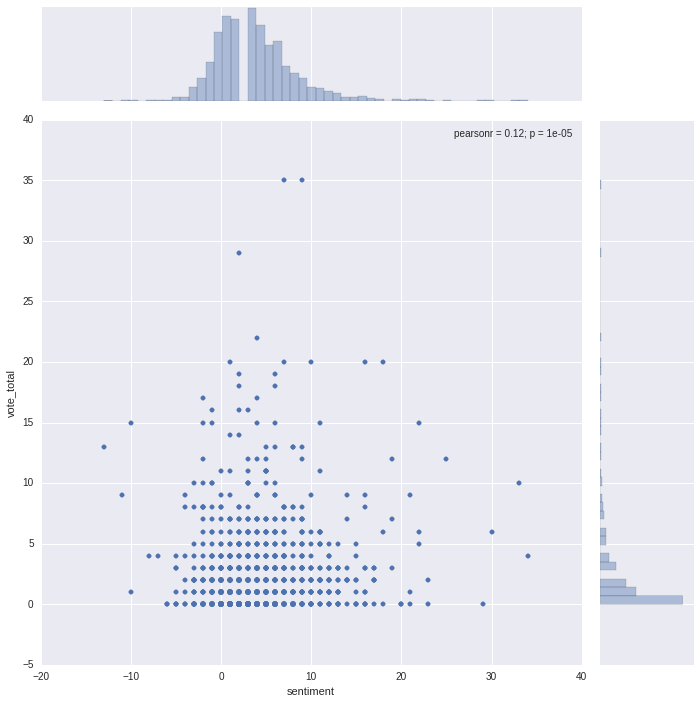

In [78]:
# yelp_3.plot(kind="scatter",x="sentiment",y="vote_total")
sns.jointplot(data=yelp_3, x='sentiment', y='vote_total', size=10)
print yelp_3.sentiment.describe(), '\n'
print yelp_3.vote_total.describe()


count    927.000000
mean       1.562028
std        4.242919
min      -20.000000
25%       -1.000000
50%        1.000000
75%        4.000000
max       24.000000
Name: sentiment, dtype: float64 

count    927.000000
mean       2.282632
std        3.274014
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       30.000000
Name: vote_total, dtype: float64


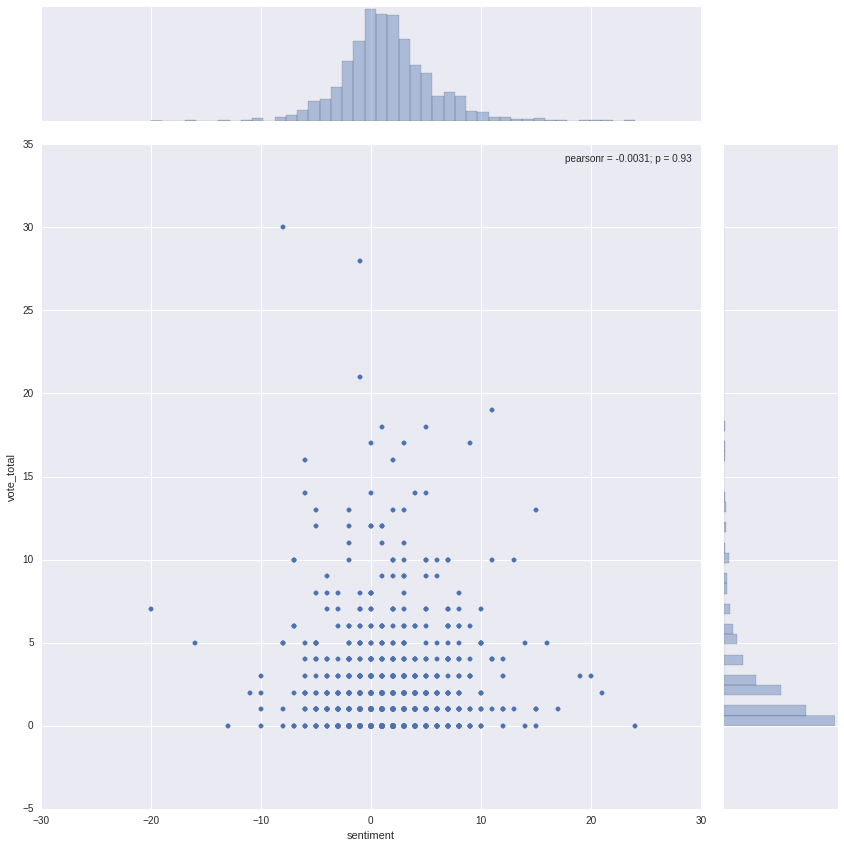

In [79]:
#yelp_2.plot(kind="scatter",x="sentiment",y="vote_total")
sns.jointplot(x='sentiment', y='vote_total', data=yelp_2, size = 12)
print yelp_2.sentiment.describe(), '\n'
print yelp_2.vote_total.describe()

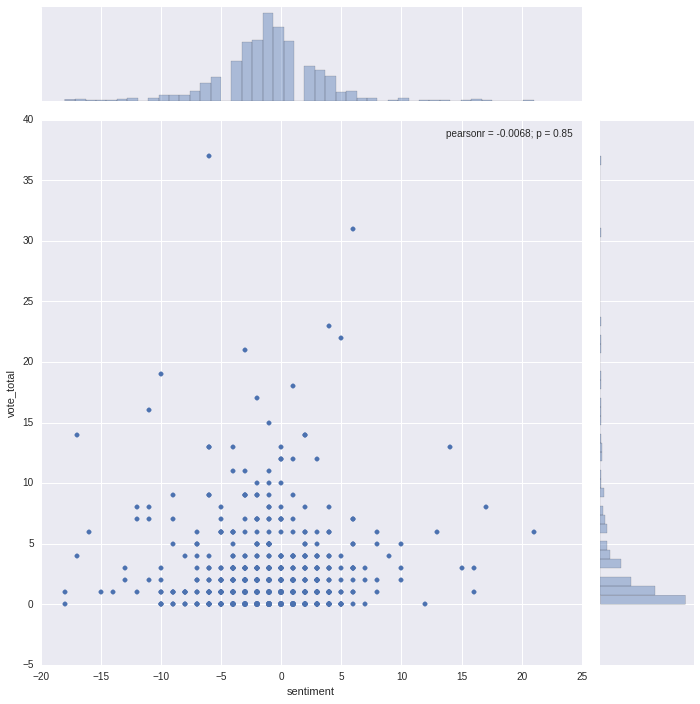

In [80]:
#yelp_1.plot(kind="scatter",x="sentiment",y="vote_total")
sns.jointplot(data=yelp_1, x='sentiment', y='vote_total', size=10)

#### Given the fact that there are not good 'boundaries' based on these features, I don't think I should use KNN, although maybe there are other features that are better than the ones I've come up with... is that one of the criteria for using KNN ?

In [82]:
yelp_df.columns

Index([u'business_id',        u'date',   u'review_id',       u'stars',
              u'text',        u'type',     u'user_id',       u'votes',
              u'cool',       u'funny',      u'useful',  u'vote_total',
         u'vote_mult',   u'sentiment',    u'sent_squ'],
      dtype='object')

In [183]:
lin_cols = ['cool','useful','sentiment','vote_total','sent_squ', 'textlen']
X = yelp_df[lin_cols]
y = yelp_df.stars
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state = 1)

In [184]:
print X_train.shape
print y_train.shape

(7500, 6)
(7500,)


In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
knn1 = KNeighborsClassifier(n_neighbors=1)

In [187]:
print knn1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')


In [188]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [189]:
y_pred1 = knn1.predict(X_test)

In [190]:
from sklearn import metrics
from sklearn import cross_validation

import numpy as np

In [191]:
def rmse_knn(num_neighbors):
    lin_cols = ['cool','useful','sentiment','vote_total','sent_squ']
    X = yelp_df[lin_cols]
    y = yelp_df.stars
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state = 1)
    
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    

In [192]:
rmse_knn(1)

1.49063744754


In [193]:
rmse_knn(50)

1.29444969002


In [194]:
rmse_knn(100)

1.33686199737


In [195]:
rmse_knn(51)

1.31651053927


In [196]:
rmse_knn(49)

1.31285947458


#### Is there a better way that this can be automated

### 10) Use Linear regression for classification

In [206]:
# This was the best linear model I could come up with:
cols = ['cool', 'vote_total','sentiment','sent_squ', 'textlen']
X = yelp_df[cols]
y = yelp_df.stars
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.33, random_state = 42)
linreg = linear_model.LinearRegression()
train_model = linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
mserr = metrics.mean_squared_error(y_test, y_pred)
rmserr = np.sqrt(mserr)
print cols, 'rmse=', rmserr
print 'linear coeff:', linreg.coef_ 
print 'intercept:', linreg.intercept_

['cool', 'vote_total', 'sentiment', 'sent_squ', 'textlen'] rmse= 1.05388869455
linear coeff: [ 0.29090247 -0.12448587  0.16947833 -0.00422775 -0.3440288 ]
intercept: 5.36240201546


In [207]:
y_pred_rnd = np.round(y_pred)

In [208]:
y_pred_rnd

array([ 4.,  4.,  4., ...,  4.,  3.,  3.])

In [209]:
metrics.accuracy_score(y_test, np.round(y_pred))

0.35969696969696968

In [210]:
# Overall: Pretty poor prediction results!